In [1]:
import numpy as np
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from tensorflow.keras.models import Sequential

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(y_train)

# categories 
categories = enc.categories_[0]
print(categories)
# convert to onehot vector
y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot  = enc.transform(y_test).toarray()

[0 1 2 3 4 5 6 7 8 9]


In [35]:
model = Sequential(
    [
        layers.Conv2D(6, (5,5), padding='same', input_shape=(32,32,3), activation='sigmoid'),
        layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Conv2D(16, (5,5), padding='valid', input_shape=(32,32,3), activation='sigmoid'),
        layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Flatten(),
        layers.Dense(400, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(120, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(84, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax'),
    ]
)
# 'relu'

In [36]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_24 (Dense)            (None, 400)              

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
train_hist = model.fit(x_train,y_train_onehot,batch_size=64,
                       epochs=30,verbose=1, validation_split=0.15, callbacks=[callback],
                       shuffle=True)

Epoch 1/30
665/665 [==============================] - 4s 5ms/step - loss: 2.0343 - accuracy: 0.2273 - val_loss: 1.7811 - val_accuracy: 0.3428
Epoch 2/30
665/665 [==============================] - 3s 4ms/step - loss: 1.7547 - accuracy: 0.3506 - val_loss: 1.6437 - val_accuracy: 0.3955
Epoch 3/30
665/665 [==============================] - 3s 5ms/step - loss: 1.6439 - accuracy: 0.3954 - val_loss: 1.6496 - val_accuracy: 0.4044
Epoch 4/30
665/665 [==============================] - 3s 5ms/step - loss: 1.5801 - accuracy: 0.4244 - val_loss: 1.5464 - val_accuracy: 0.4369
Epoch 5/30
665/665 [==============================] - 3s 4ms/step - loss: 1.5299 - accuracy: 0.4424 - val_loss: 1.4678 - val_accuracy: 0.4560
Epoch 6/30
665/665 [==============================] - 3s 4ms/step - loss: 1.4803 - accuracy: 0.4620 - val_loss: 1.4603 - val_accuracy: 0.4652
Epoch 7/30
665/665 [==============================] - 3s 4ms/step - loss: 1.4509 - accuracy: 0.4728 - val_loss: 1.4038 - val_accuracy: 0.4883
Epoch 

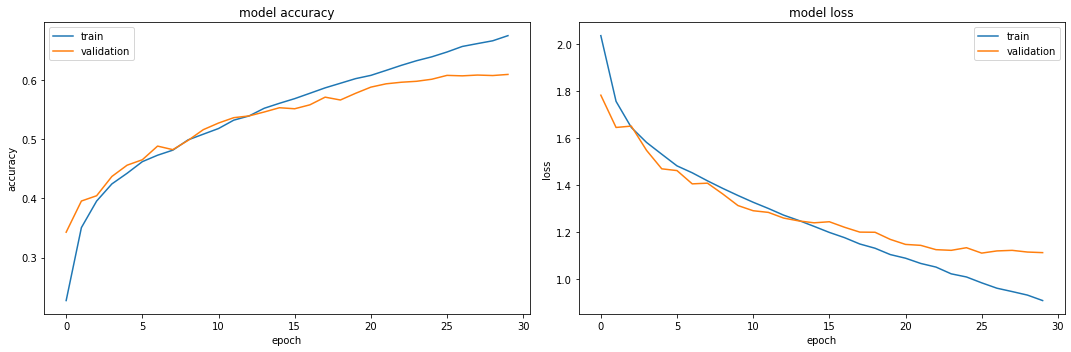

In [39]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# Show the training accuracy 
axs[0].plot(train_hist.history['accuracy'])   # 'acc' in sklearn 0.21 / 'accuracy' in sklearn 0.24 
axs[0].plot(train_hist.history['val_accuracy']) # val_acc / val_accuracy
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

# Show the training loss
axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()